In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.stats import ttest_rel
sns.set(style="whitegrid")

In [2]:
ls

2mag_final.csv
ANI_time_Dialister.png
Fig1E_LR-MG-metaanalysis.ipynb
Fig2_&_SuppFig3_analysis_MAG.ipynb
Fig2_ideel_unc.ipynb
Fig5_ANI_time-series_cMAG-278.ipynb
Figure_2_ecology.ipynb
Functional_Pangenome_analysis_PIRATE-Scoary2.md
Functional_Pangenome_analysis_PIRATE-Scoary2_final.md
ML_function_r1M_PAV_lg.ipynb
ML_function_r1M_relabund_lg.ipynb
ML_taxa_PAV__linear_growth.ipynb
ML_taxa_relabun__linear_growth.ipynb
ML_venn_results.ipynb
Supp_fig1_a_extraction_yield.ipynb
Supp_fig1_seq-stats.ipynb
Supp_fig1_sequencing_QC.ipynb
Supp_fig4_SRvsLR_cost_analysis.ipynb
grouped_raw.csv
unclassified.ipynb


In [ ]:
df=pd.read_csv('../Table_S15_unclassified_rate.csv')

In [14]:
df.head()

,Taxa,unclassified,total,unclassified_percent,database,method,dataset,method_dataset,name
0,HsapMB436,187792999,390148990,48.133663,standard (0 cMAGs),seqwell HiFi,original,seqwell HiFi_original,526.FB00055451.PB.G1.P3_RevioSPRQ_s4.SW.B08
1,HsapMB436,40521000,390148991,10.386032,986 cMAG,seqwell HiFi,original,seqwell HiFi_original,526.FB00055451.PB.G1.P3_RevioSPRQ_s4.SW.B08
2,HsapMB526,171047000,348853994,49.031114,standard (0 cMAGs),seqwell HiFi,original,seqwell HiFi_original,526.FB00055451.PB.G1.P3_Vega.SW.B08
3,HsapMB526,40271999,348853993,11.544084,986 cMAG,seqwell HiFi,original,seqwell HiFi_original,526.FB00055451.PB.G1.P3_Vega.SW.B08
4,HsapMB438,188532000,346000989,54.488862,standard (0 cMAGs),seqwell HiFi,original,seqwell HiFi_original,526.FB00259294.PB.G1.P3_RevioSPRQ_s4.SW.D08


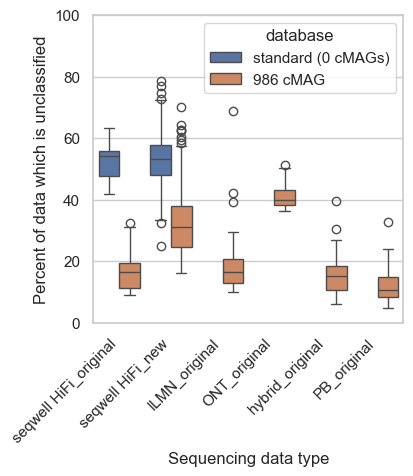

In [39]:
plt.figure(figsize=(4,4))
colors=["set1"]
sns.boxplot(data=df, x="method_dataset", y="unclassified_percent", hue="database")
plt.xlabel('Sequencing data type')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Percent of data which is unclassified')
# Set axis ranges
plt.ylim(0, 100) 
plt.savefig("../Figures/Fig3_unclassified.png", dpi=600, bbox_inches="tight")

In [42]:
seqwell_0 = df.loc[(df['database'] == 'standard (0 cMAGs)') & (df['method'] == 'seqwell HiFi')]
seqwell_0_org=seqwell_0.loc[seqwell_0['dataset']=='original']
seqwell_0_org.head(20)
seqwell_0_naive=seqwell_0.loc[seqwell_0['dataset']=='new']

In [43]:
seqwell_986 = df.loc[(df['database'] == '986 cMAG') & (df['method'] == 'seqwell HiFi')]
seqwell_986_org=seqwell_986.loc[seqwell_986['dataset']=='original']
seqwell_986_org.head(20)
seqwell_986_naive=seqwell_986.loc[seqwell_986['dataset']=='new']

In [37]:
ILMN=df.loc[df['method']=='ILMN']
ONT=df.loc[df['method']=='ONT']
PB=df.loc[df['method']=='PB']
Hybrid=df.loc[df['method']=='hybrid']

In [30]:
ILMN.describe()

,unclassified,total,unclassified_percent
count,4.800000e+01,4.800000e+01,48.000000
mean,1.706196e+09,9.855739e+09,19.211666
std,8.086237e+08,3.665505e+09,9.982628
min,6.167000e+06,8.960000e+06,10.158453
25%,1.281952e+09,1.005480e+10,13.064116
50%,1.656401e+09,1.084515e+10,16.523830
75%,2.079147e+09,1.210207e+10,20.661815
max,3.453323e+09,1.491013e+10,68.828125


In [31]:
ONT.describe()

,unclassified,total,unclassified_percent
count,4.700000e+01,4.700000e+01,47.000000
mean,6.152551e+09,1.525432e+10,40.752710
std,8.529961e+09,2.130027e+10,3.473639
min,8.899000e+06,1.975000e+07,36.370537
25%,1.164450e+09,2.932356e+09,38.123226
50%,2.842592e+09,7.067798e+09,39.777950
75%,6.058253e+09,1.570420e+10,43.280057
max,3.297939e+10,8.799087e+10,51.111233


In [32]:
PB.describe()

,unclassified,total,unclassified_percent
count,4.700000e+01,4.700000e+01,47.000000
mean,1.298118e+09,1.141951e+10,12.284913
std,1.484339e+09,1.180962e+10,5.781152
min,2.780400e+07,1.432770e+08,4.948066
25%,2.786255e+08,2.655862e+09,8.548165
50%,8.179760e+08,8.407151e+09,10.650722
75%,1.552464e+09,1.453139e+10,14.783256
max,6.180859e+09,4.826566e+10,32.638875


In [38]:
Hybrid.describe()

,unclassified,total,unclassified_percent
count,4.700000e+01,4.700000e+01,47.000000
mean,2.311935e+09,1.521188e+10,16.082117
std,2.635626e+09,1.527923e+10,7.207820
min,1.592730e+08,7.223240e+08,6.265104
25%,7.462495e+08,5.496622e+09,10.762813
50%,1.301048e+09,9.453071e+09,15.269961
75%,2.615620e+09,1.908468e+10,18.538992
max,1.092693e+10,6.823111e+10,39.571025


In [44]:
# includes the new samples (from expanded dataset) which were previously sequencing (24 samples from original 47 were resequence) ... classification used the 986 cMAG amended database 
seqwell_0_org.describe() #

,unclassified,total,unclassified_percent
count,4.800000e+01,4.800000e+01,48.000000
mean,1.142059e+08,2.227643e+08,52.327815
std,5.773589e+07,1.104361e+08,5.809472
min,9.525000e+06,1.505300e+07,41.745595
25%,6.585875e+07,1.200727e+08,47.600895
50%,1.086055e+08,2.279650e+08,54.330352
75%,1.633730e+08,2.999245e+08,55.889553
max,2.615660e+08,4.739030e+08,63.276423


In [45]:
# includes the new samples (from expanded dataset) which were NOT previously sequenced
#... classification used the standard cMAG amended database 

seqwell_0_naive.describe()

,unclassified,total,unclassified_percent
count,4.490000e+02,4.490000e+02,449.000000
mean,5.585254e+07,1.084733e+08,53.187088
std,4.546278e+07,8.884569e+07,7.587358
min,4.410000e+05,9.670000e+05,25.031304
25%,2.180100e+07,4.105600e+07,47.873472
50%,4.293000e+07,8.061699e+07,53.242041
75%,7.810600e+07,1.490040e+08,57.769829
max,2.323200e+08,4.873930e+08,78.682263


In [47]:
# includes the new samples (from expanded dataset) which were previously sequencing (24 samples from original 47 were resequence) ... classification used the 986 cMAG amended database 
seqwell_986_org.describe() #

,unclassified,total,unclassified_percent
count,4.800000e+01,4.800000e+01,48.000000
mean,3.358171e+07,2.227643e+08,16.533370
std,1.793016e+07,1.104361e+08,5.849774
min,4.757999e+06,1.505300e+07,9.031270
25%,2.154700e+07,1.200727e+08,11.226556
50%,2.828800e+07,2.279650e+08,16.431360
75%,4.203425e+07,2.999245e+08,19.456329
max,8.050300e+07,4.739030e+08,32.505148


In [49]:
# includes the new samples (from expanded dataset) which were not previously sequencing 
#...classification used the 986 cMAG amended database 
seqwell_986_naive.describe()


,unclassified,total,unclassified_percent
count,4.490000e+02,4.490000e+02,449.000000
mean,3.220523e+07,1.084733e+08,32.352523
std,2.630049e+07,8.884569e+07,9.775400
min,4.420000e+05,9.670000e+05,16.297114
25%,1.312800e+07,4.105600e+07,24.768806
50%,2.458900e+07,8.061699e+07,31.205902
75%,4.483800e+07,1.490040e+08,37.823730
max,1.387920e+08,4.873930e+08,69.979206
